<a href="https://colab.research.google.com/github/duqrldudgns/deep_learning/blob/master/3_4_classifying_movie_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import keras
keras.__version__

'2.4.3'

### IMDB 데이터셋
인터넷 영화 데이터베이스로부터 가져온 양극단의 리뷰 50,000개로 이루어진 IMDB 데이터셋을 사용하겠습니다. 이 데이터셋은 훈련 데이터 25,000개와 테스트 데이터 25,000개로 나뉘어 있고 각각 50%는 부정, 50%는 긍정 리뷰로 구성되어 있습니다.

왜 훈련 데이터와 테스트 데이터를 나눌까요? 같은 데이터에서 머신 러닝 모델을 훈련하고 테스트해서는 절대 안 되기 때문입니다! 모델이 훈련 데이터에서 잘 작동한다는 것이 처음 만난 데이터에서도 잘 동작한다는 것을 보장하지 않습니다. 중요한 것은 새로운 데이터에 대한 모델의 성능입니다(사실 훈련 데이터의 레이블은 이미 알고 있기 때문에 이를 예측하는 모델은 필요하지 않습니다). 예를 들어 모델이 훈련 샘플과 타깃 사이의 매핑을 모두 외워버릴 수 있습니다. 이런 모델은 처음 만나는 데이터에서 타깃을 예측하는 작업에는 쓸모가 없습니다. 다음 장에서 이에 대해 더 자세히 살펴보겠습니다.

MNIST 데이터셋처럼 IMDB 데이터셋도 케라스에 포함되어 있습니다. 이 데이터는 전처리되어 있어 각 리뷰(단어 시퀀스)가 숫자 시퀀스로 변환되어 있습니다. 여기서 각 숫자는 사전에 있는 고유한 단어를 나타냅니다.

다음 코드는 데이터셋을 로드합니다(처음 실행하면 17MB 정도의 데이터가 컴퓨터에 다운로드됩니다):

In [26]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


매개변수 num_words=10000은 훈련 데이터에서 가장 자주 나타나는 단어 10,000개만 사용하겠다는 의미입니다. 드물게 나타나는 단어는 무시하겠습니다. 이렇게 하면 적절한 크기의 벡터 데이터를 얻을 수 있습니다.

변수 train_data와 test_data는 리뷰의 목록입니다. 각 리뷰는 단어 인덱스의 리스트입니다(단어 시퀀스가 인코딩된 것입니다). train_labels와 test_labels는 부정을 나타내는 0과 긍정을 나타내는 1의 리스트입니다:

In [27]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [28]:
train_labels[0]

1

가장 자주 등장하는 단어 10,000개로 제한했기 때문에 단어 인덱스는 10,000을 넘지 않습니다:

In [29]:
max([max(sequence) for sequence in train_data])

9999

재미 삼아 이 리뷰 데이터 하나를 원래 영어 단어로 어떻게 바꾸는지 보겠습니다:

In [30]:
# word_index는 단어와 정수 인덱스를 매핑한 딕셔너리입니다
word_index = imdb.get_word_index()
# 정수 인덱스와 단어를 매핑하도록 뒤집습니다
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 리뷰를 디코딩합니다. 
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [31]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### 데이터 준비
신경망에 숫자 리스트를 주입할 수는 없습니다. 리스트를 텐서로 바꾸는 두 가지 방법이 있습니다:

- 같은 길이가 되도록 리스트에 패딩을 추가하고 (samples, sequence_length) 크기의 정수 텐서로 변환합니다. 그다음 이 정수 텐서를 다룰 수 있는 층을 신경망의 첫 번째 층으로 사용합니다(Embedding 층을 말하며 나중에 자세히 다루겠습니다).
- 리스트를 원-핫 인코딩하여 0과 1의 벡터로 변환합니다. 예를 들면 시퀀스 [3, 5]를 인덱스 3과 5의 위치는 1이고 그 외는 모두 0인 10,000차원의 벡터로 각각 변환합니다. 그다음 부동 소수 벡터 데이터를 다룰 수 있는 Dense 층을 신경망의 첫 번째 층으로 사용합니다.


여기서는 두 번째 방식을 사용하고 이해를 돕기 위해 직접 데이터를 원-핫 벡터로 만들겠습니다:

In [32]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results

# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)

이제 샘플은 다음과 같이 나타납니다:

In [33]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])


레이블은 쉽게 벡터로 바꿀 수 있습니다:

In [34]:
# 레이블을 벡터로 바꿉니다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

이제 신경망에 주입할 데이터가 준비되었습니다.

### 신경망 모델 만들기

다음은 이 신경망의 케라스 구현입니다. 이전에 보았던 MNIST 예제와 비슷합니다:

In [35]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

마지막으로 손실 함수와 옵티마이저를 선택해야 합니다. 이진 분류 문제이고 신경망의 출력이 확률이기 때문에(네트워크의 끝에 시그모이드 활성화 함수를 사용한 하나의 유닛으로 된 층을 놓았습니다), binary_crossentropy 손실이 적합합니다. 이 함수가 유일한 선택은 아니고 예를 들어 mean_squared_error를 사용할 수도 있습니다. 확률을 출력하는 모델을 사용할 때는 크로스엔트로피가 최선의 선택입니다. 크로스엔트로피는 정보 이론 분야에서 온 개념으로 확률 분포 간의 차이를 측정합니다. 여기에서는 원본 분포와 예측 분포 사이를 측정합니다.

다음은 rmsprop 옵티마이저와 binary_crossentropy 손실 함수로 모델을 설정하는 단계입니다. 훈련하는 동안 정확도를 사용해 모니터링하겠습니다.

In [36]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

케라스에 rmsprop, binary_crossentropy, accuracy가 포함되어 있기 때문에 옵티마이저, 손실 함수, 측정 지표를 문자열로 지정하는 것이 가능합니다. 이따금 옵티마이저의 매개변수를 바꾸거나 자신만의 손실 함수, 측정 함수를 전달해야 할 경우가 있습니다. 전자의 경우에는 옵티마이저 파이썬 클래스를 사용해 객체를 직접 만들어 optimizer 매개변수에 전달하면 됩니다:

In [37]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

후자의 경우는 loss와 metrics 매개변수에 함수 객체를 전달하면 됩니다:

In [38]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])


In [39]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### 훈련 검증
훈련하는 동안 처음 본 데이터에 대한 모델의 정확도를 측정하기 위해서는 원본 훈련 데이터에서 10,000의 샘플을 떼어서 검증 세트를 만들어야 합니다:

In [40]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


이제 모델을 512개 샘플씩 미니 배치를 만들어 20번의 에포크 동안 훈련시킵니다(x_train과 y_train 텐서에 있는 모든 샘플에 대해 20번 반복합니다). 동시에 따로 떼어 놓은 10,000개의 샘플에서 손실과 정확도를 측정할 것입니다. 이렇게 하려면 validation_data 매개변수에 검증 데이터를 전달해야 합니다:

In [41]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 43ms/step - loss: 0.4964 - accuracy: 0.7910 - val_loss: 0.3832 - val_accuracy: 0.8577
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2985 - accuracy: 0.9042 - val_loss: 0.3058 - val_accuracy: 0.8856
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2232 - accuracy: 0.9297 - val_loss: 0.2890 - val_accuracy: 0.8839
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1760 - accuracy: 0.9447 - val_loss: 0.2771 - val_accuracy: 0.8897
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1429 - accuracy: 0.9536 - val_loss: 0.2845 - val_accuracy: 0.8863
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1132 - accuracy: 0.9669 - val_loss: 0.2940 - val_accuracy: 0.8884
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0946 - accuracy: 0.9718 - val_loss: 0.3192 - val_accuracy: 0.8793
Epoch 8/20
30

In [42]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

이 딕셔너리는 훈련과 검증하는 동안 모니터링할 측정 지표당 하나씩 모두 네 개의 항목을 담고 있습니다. 맷플롯립을 사용해 훈련과 검증 데이터에 대한 손실과 정확도를 그려 보겠습니다:

In [43]:
import matplotlib.pyplot as plt

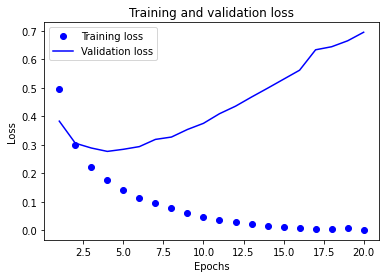

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

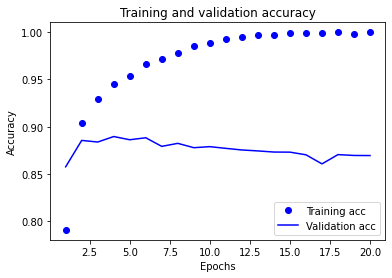

In [47]:
plt.clf()   # 그래프를 초기화합니다
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [48]:

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 31ms/step - loss: 0.4393 - accuracy: 0.8281
Epoch 2/4
49/49 [==============================] - 2s 34ms/step - loss: 0.2559 - accuracy: 0.9118
Epoch 3/4
49/49 [==============================] - 2s 34ms/step - loss: 0.2007 - accuracy: 0.9285
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3003 - accuracy: 0.8809


In [50]:
results


[0.30033642053604126, 0.8808799982070923]

### 훈련된 모델로 새로운 데이터에 대해 예측하기


In [51]:
model.predict(x_test)


array([[0.15314165],
       [0.99931324],
       [0.84784436],
       ...,
       [0.09151053],
       [0.06247455],
       [0.5802089 ]], dtype=float32)